In [1]:
import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

%matplotlib inline

In [2]:
import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame

data_train = pd.read_csv("./datas/train.csv")
data_test = pd.read_csv("./datas/test.csv")

data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
data1 = data_train[["YearBuilt","GarageYrBlt"]].copy()
print(data1.info())
print(data1[data1.GarageYrBlt.isna()].head())

data1.GarageYrBlt[data1.GarageYrBlt.isna()] = data1.YearBuilt[data1.GarageYrBlt.isna()]

print('-'*10)
print(data1[data1.GarageYrBlt.isna()].head())

print(data1.head(40))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
YearBuilt      1460 non-null int64
GarageYrBlt    1379 non-null float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB
None
    YearBuilt  GarageYrBlt
39       1955          NaN
48       1920          NaN
78       1968          NaN
88       1915          NaN
89       1994          NaN
----------
Empty DataFrame
Columns: [YearBuilt, GarageYrBlt]
Index: []
    YearBuilt  GarageYrBlt
0        2003       2003.0
1        1976       1976.0
2        2001       2001.0
3        1915       1998.0
4        2000       2000.0
5        1993       1993.0
6        2004       2004.0
7        1973       1973.0
8        1931       1931.0
9        1939       1939.0
10       1965       1965.0
11       2005       2005.0
12       1962       1962.0
13       2006       2006.0
14       1960       1960.0
15       1929       1991.0
16       1970       1970.0
17       1967       1967.0
18       2004       

D:\Anaconda2\envs\python36\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 3 columns):
YearBuilt      1379 non-null int64
GarageYrBlt    1379 non-null float64
Difference     1379 non-null float64
dtypes: float64(2), int64(1)
memory usage: 43.1 KB
None
----------


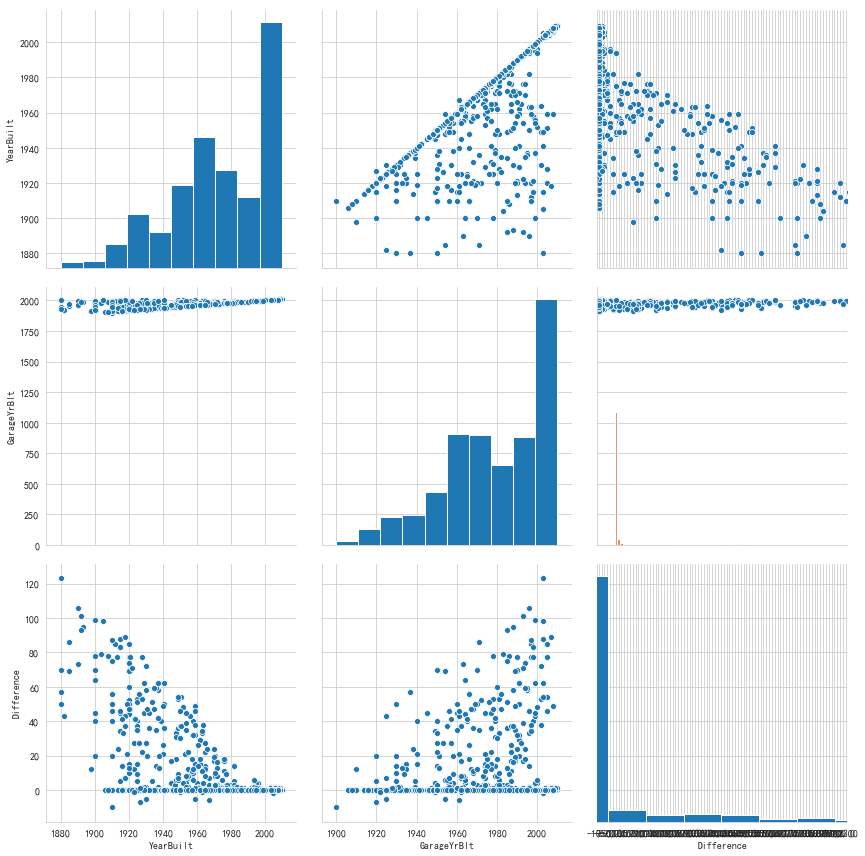

In [43]:
'''
data1 = pd.concat((pd.DataFrame({"data":data_train.YearBuilt,"type":'YearBuilt'}),
                  pd.DataFrame({"data":data_train.GarageYrBlt,"type":'GarageYrBlt'})))
sns.pairplot(data1, hue="type", height=4)
data1.sample(10)
'''

data1 = data_train[["YearBuilt","GarageYrBlt"]]
data1 = data1[data1["GarageYrBlt"].notnull()]
data1["Difference"] = data1.GarageYrBlt - data1.YearBuilt
print(data1.info())
sns.pairplot(data1, height=4)

#sns.countplot(x="Difference",data=data1)

In [42]:
df = pd.DataFrame({'A': [1, np.nan, 1, 2, 1, np.nan, 3],
                  'B': [1,1, 1, 2, 2, 2, 3]})
print(df)

#df[df["A"].isna()]=df['A'].mode()

#df[df["A"].isna()]= df['A'].mode().iloc[0]

print(df)

     A  B
0  1.0  1
1  NaN  1
2  1.0  1
3  2.0  2
4  1.0  2
5  NaN  2
6  3.0  3
     A  B
0  1.0  1
1  NaN  1
2  1.0  1
3  2.0  2
4  1.0  2
5  NaN  2
6  3.0  3


In [43]:
print(df.groupby(['B'])['A'].mean())
print(df.groupby(['B'])['A'].mean()[df['B'][df["A"].isna()]])

gr = df.groupby(['B'])['A'].mean()
df['A'][df["A"].isna()] =  df['B'][df["A"].isna()].apply(lambda x:gr[x])
print(df)

B
1    1.0
2    1.5
3    3.0
Name: A, dtype: float64
B
1    1.0
2    1.5
Name: A, dtype: float64
     A  B
0  1.0  1
1  1.0  1
2  1.0  1
3  2.0  2
4  1.0  2
5  1.5  2
6  3.0  3


D:\Anaconda2\envs\python36\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
